In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag


import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# Read data into papers
papers = pd.read_csv('Data/raw_clean_data.csv')
# Print head
papers.head()

,text,rating,Label
0,beautiful accomodations stayed hotel santa mar...,4,Positive
1,great hotel great location hotel located la ra...,5,Positive
2,beautiful hotel great location like beautifull...,4,Positive
3,great deal waikiki trip hawaii outrigger luana...,4,Positive
4,choose airport hotel busy triparound australia...,1,Negative


In [3]:
papers['text'][0]

'beautiful accomodations stayed hotel santa maria novella night wished stayed entirety days florence simply gorgeous accomodations, room stayed cheapest rate available assuming simplest abode offer beautiful hardwood floors bed linens comfortable mattress difficult italy drapes fantastic marble bathroom, nicer expecting especially price, location not central 10-minute walk sights close train station away noise bustle busier locations, close upscale shopping lots trattorias, nice oasis hectic sightseeing florence highly recommed hotel hotels higher ranked website,  '

# Tokenization, Stopwords, Lemmatization

In [4]:
def process_doc(doc):

        #initialize lemmatizer
        wnl = WordNetLemmatizer()
        stop_words = stopwords.words('english')
        
        # helper function to change nltk's part of speech tagging to a wordnet format.
        def pos_tagger(nltk_tag):
            if nltk_tag.startswith('J'):
                return wordnet.ADJ
            elif nltk_tag.startswith('V'):
                return wordnet.VERB
            elif nltk_tag.startswith('N'):
                return wordnet.NOUN
            elif nltk_tag.startswith('R'):
                return wordnet.ADV
            else:         
                return None


        # remove stop words and punctuations, then lower case
        doc_norm = [tok.lower() for tok in word_tokenize(doc) if ((tok.isalpha()) & (tok.lower() not in stop_words)) ]

        #  POS detection on the result will be important in telling Wordnet's lemmatizer how to lemmatize

        # creates list of tuples with tokens and POS tags in wordnet format
        wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tag(doc_norm))) 
        doc_norm = [wnl.lemmatize(token, pos) for token, pos in wordnet_tagged if pos is not None]

        return " ".join(doc_norm)

In [5]:
papers['text'] = papers['text'].apply(process_doc)

In [147]:
papers['text'][0]

'beautiful accomodations stay hotel santa maria novella night wish stayed entirety day florence simply gorgeous accomodations room stay cheap rate available assume simple abode offer beautiful hardwood floor bed linens comfortable mattress difficult italy drape fantastic marble bathroom nicer expect especially price location central walk sight close train station away noise bustle busy location close upscale shopping lot trattorias nice oasis hectic sightsee florence highly recommed hotel hotel higher rank website'

# EDA 

In [7]:
# !pip install wordcloud

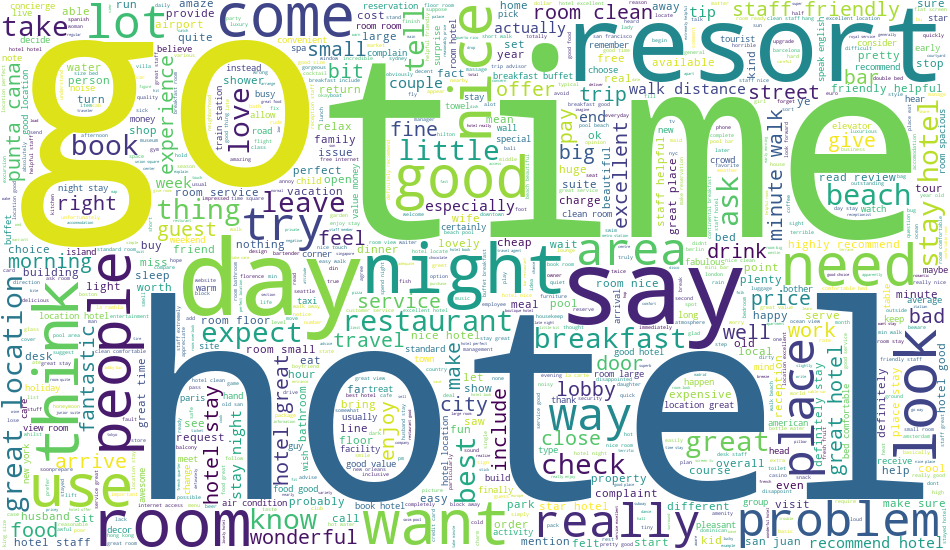

In [119]:


# Join the different processed titles together.
long_string = ','.join(list(papers['text'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white",width = 950, height = 550, max_words=5000)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [143]:
mar_logo = np.array(Image.open('Data/Color-Marriott-logo.jpg'))

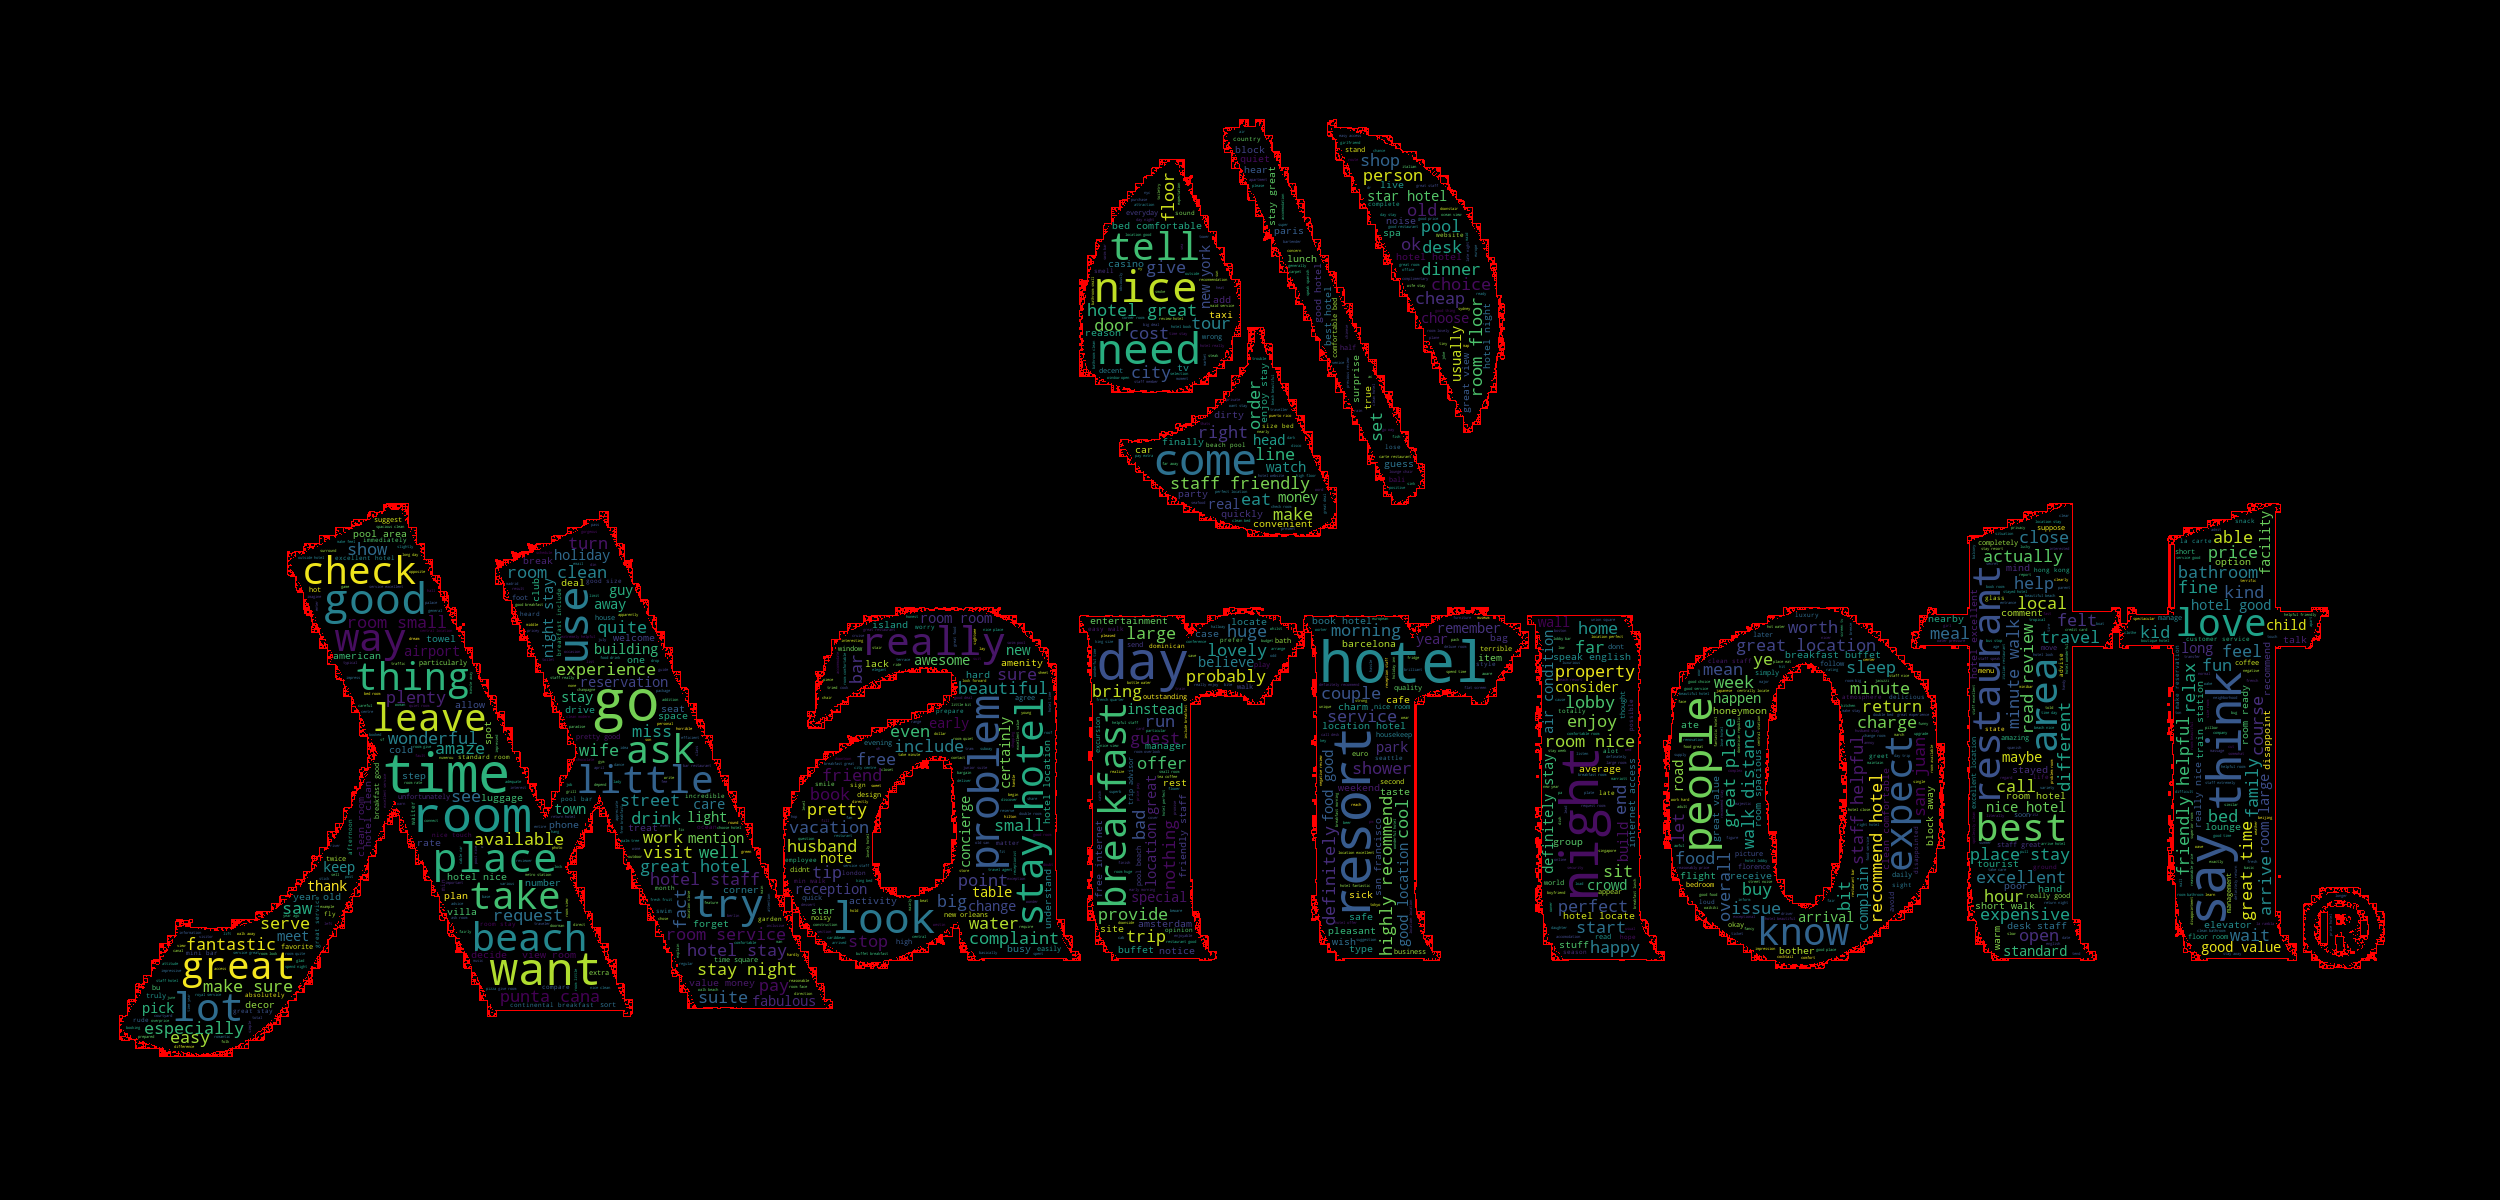

In [145]:
nwc = WordCloud(background_color="black", mask=mar_logo,width = 800, height = 500,
            contour_width=1, contour_color='red',max_words=10000)

# generate word cloud
nwc.generate(long_string)
nwc.to_image()

# Topic Modeling

In [164]:
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

In [165]:
corpus = papers['text']

In [166]:
vec = TfidfVectorizer()
X_train = vec.fit_transform(corpus)
X_train

<20491x41790 sparse matrix of type '<class 'numpy.float64'>'
	with 1470033 stored elements in Compressed Sparse Row format>

In [178]:
topic_model = NMF(n_components=6,max_iter=1000)
topic_model.fit(X_train)

NMF(max_iter=1000, n_components=6)

In [179]:
H = topic_model.transform(X_train)

W = topic_model.components_

print(f'Shape of W is {W.shape}')
print(f'Shape of H is {H.shape}')
print(f'Shape of X_train {X_train.shape}')

Shape of W is (6, 41790)
Shape of H is (20491, 6)
Shape of X_train (20491, 41790)


## The W Matrix

In [180]:
for index, topic in enumerate(W):
    print(f'The top 10 words for topic #{index}')
    print([vec.get_feature_names()[i] for i in topic.argsort()[-30:]])
    print('\n')

The top 10 words for topic #0
['problem', 'call', 'come', 'leave', 'shower', 'bad', 'arrive', 'work', 'give', 'small', 'view', 'door', 'bathroom', 'go', 'pay', 'service', 'stay', 'time', 'book', 'tell', 'say', 'day', 'get', 'ask', 'floor', 'desk', 'check', 'night', 'bed', 'room']


The top 10 words for topic #1
['tip', 'say', 'make', 'fun', 'want', 'kid', 'lot', 'week', 'best', 'trip', 'service', 'punta', 'cana', 'bar', 'get', 'buffet', 'water', 'drink', 'beautiful', 'restaurant', 'vacation', 'good', 'go', 'people', 'day', 'time', 'pool', 'food', 'beach', 'resort']


The top 10 words for topic #2
['price', 'right', 'new', 'square', 'service', 'highly', 'bed', 'excellent', 'breakfast', 'really', 'value', 'night', 'time', 'recommend', 'comfortable', 'wonderful', 'fantastic', 'definitely', 'love', 'perfect', 'view', 'place', 'clean', 'helpful', 'friendly', 'room', 'staff', 'stay', 'location', 'great']


The top 10 words for topic #3
['make', 'restaurant', 'feel', 'year', 'definitely', 're

In [174]:
topic_name_dict = {0:'Guest_Experience_&_Interactions', 1:'Beach_Resort', 2:' Value_and_Comfort',
                   3:'Trip_Exploration', 4:'Transportation_Accommodation', 5:'Urban_Retreats'}